In [1]:
from google.colab import drive
import os 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
os.chdir("/content/drive/MyDrive")

In [3]:
import tensorflow as tf

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from glob import glob
from tqdm import tqdm
import os

In [4]:
DATA_DIR = '/content/drive/MyDrive/데이콘/팔당댐 홍수 안전운영에 따른 한강 수위예측 AI 경진대회/competition_data'

In [5]:
RAINFALL_DIR = os.path.join(DATA_DIR, 'rf_data')
RAINFALL_DIR

'/content/drive/MyDrive/데이콘/팔당댐 홍수 안전운영에 따른 한강 수위예측 AI 경진대회/competition_data/rf_data'

In [6]:
WATERL_DIR = os.path.join(DATA_DIR, 'water_data')
WATERL_DIR

'/content/drive/MyDrive/데이콘/팔당댐 홍수 안전운영에 따른 한강 수위예측 AI 경진대회/competition_data/water_data'

In [7]:
w_list = glob(os.path.join(WATERL_DIR, '*.csv'))

In [8]:
rf_list = glob(os.path.join(RAINFALL_DIR, '*.csv'))

In [9]:
def load_data(year):
    water = pd.read_csv(f'/content/drive/MyDrive/데이콘/팔당댐 홍수 안전운영에 따른 한강 수위예측 AI 경진대회/competition_data/water_data/data_{year}.csv')
    rainfall = pd.read_csv(f'/content/drive/MyDrive/데이콘/팔당댐 홍수 안전운영에 따른 한강 수위예측 AI 경진대회/competition_data/rf_data/rf_{year}.csv')

    df = pd.merge(water, rainfall, how='left', on='ymdhm')
    df['ymdhm'] = pd.to_datetime(df['ymdhm'])
    df = df[(df['ymdhm'].dt.month < 8) & (df['ymdhm'].dt.month >= 5)]
    df = df.set_index('ymdhm')

    df = df.drop(columns=['fw_1018680'])

    for col in df.columns:
        df[col] = df[col].interpolate()
        df[col] = df[col].dropna()

    return df

In [10]:
# train_df_list = []
# valid_df_list = []

# for year in range(2012, 2022):
#     df = load_data(year)
#     df['year'] = year
#     if year < 2020:
#         train_df_list.append(df)
#     else:
#         valid_df_list.append(df)

In [11]:
train_df_list = []
valid_df_list = []

for year in range(2012, 2022):
    df = load_data(year)
    df['year'] = year
    train_df_list.append(df)

In [12]:
len(train_df_list)

10

In [13]:
# test_data = load_data('2022')
# test_data['year'] = 2022
# test_data.head()
# test_data.shape

In [14]:
train_data = pd.concat(train_df_list)
# valid_data = pd.concat(valid_df_list)
# train_data.shape#, valid_data.shape

In [15]:
train_data

swl    inf     sfw   ecpc  tototf  tide_level  \
ymdhm                                                                   
2012-05-01 00:00:00  24.800  555.0  219.07  24.93   555.0       445.0   
2012-05-01 00:10:00  24.794  464.6  218.86  25.15   562.9       449.0   
2012-05-01 00:20:00  24.789  478.1  218.69  25.31   576.4       451.0   
2012-05-01 00:30:00  24.789  464.8  218.69  25.31   563.1       452.0   
2012-05-01 00:40:00  24.789  478.1  218.69  25.31   576.4       450.0   
...                     ...    ...     ...    ...     ...         ...   
2021-07-31 23:10:00  25.070  250.0  213.96  30.04   149.0       549.0   
2021-07-31 23:20:00  25.070  244.0  213.96  30.04   143.0       546.0   
2021-07-31 23:30:00  25.070  244.0  213.96  30.04   143.0       541.0   
2021-07-31 23:40:00  25.060   42.0  213.59  30.41   143.0       533.0   
2021-07-31 23:50:00  25.060   42.0  213.59  30.41   143.0       524.0   

                     wl_1018662  fw_1018662  wl_1018680  wl_1018683  \
ymdhm                                                                 
2012-05-01 00:00:00       310.7      469.05       300.2       290.0   
2012-05-01 00:10:00       314.7      498.00       300.2       290.0   
2012-05-01 00:20:00       313.7      490.68       301.2       290.0   
2012-05-01 00:30:00       311.7      476.21       301.2       290.0   
2012-05-01 00:40:00       311.7      476.21       301.2       291.0   
...                         ...         ...         ...         ...   
2021-07-31 23:10:00       281.7      285.72       277.2       279.0   
2021-07-31 23:20:00       281.7      285.72       277.2       278.0   
2021-07-31 23:30:00       281.7      285.72       277.2       278.0   
2021-07-31 23:40:00       281.7      285.72       277.2       278.0   
2021-07-31 23:50:00       281.7      285.72       277.2       278.0   

                     fw_1018683  wl_1019630  fw_1019630  rf_10184100  \
ymdhm                                                                  
2012-05-01 00:00:00      729.80       275.3      540.18          0.0   
2012-05-01 00:10:00      731.48       275.3      540.18          0.0   
2012-05-01 00:20:00      726.42       275.3      540.18          0.0   
2012-05-01 00:30:00      726.42       276.3      552.17          0.0   
2012-05-01 00:40:00      707.17       277.3      564.29          0.0   
...                         ...         ...         ...          ...   
2021-07-31 23:10:00      286.12       264.3      417.17          0.0   
2021-07-31 23:20:00      277.43       264.3      417.17          0.0   
2021-07-31 23:30:00      318.84       263.3      406.79          0.0   
2021-07-31 23:40:00      265.01       263.3      406.79          0.0   
2021-07-31 23:50:00      248.45       263.3      406.79          0.0   

                     rf_10184110  rf_10184140  year  
ymdhm                                                
2012-05-01 00:00:00          0.0          0.0  2012  
2012-05-01 00:10:00          0.0          0.0  2012  
2012-05-01 00:20:00          0.0          0.0  2012  
2012-05-01 00:30:00          0.0          0.0  2012  
2012-05-01 00:40:00          0.0          0.0  2012  
...                          ...          ...   ...  
2021-07-31 23:10:00          0.0          0.0  2021  
2021-07-31 23:20:00          0.0          0.0  2021  
2021-07-31 23:30:00          0.0          0.0  2021  
2021-07-31 23:40:00          0.0          0.0  2021  
2021-07-31 23:50:00          0.0          0.0  2021  

[132480 rows x 17 columns]

In [16]:
train_data.isnull().sum()

swl            0
inf            0
sfw            0
ecpc           0
tototf         0
tide_level     0
wl_1018662     0
fw_1018662     0
wl_1018680     0
wl_1018683     0
fw_1018683     0
wl_1019630     0
fw_1019630     0
rf_10184100    0
rf_10184110    0
rf_10184140    0
year           0
dtype: int64

In [17]:
# valid_data.isnull().sum()

In [18]:
# test_data.isnull().sum()

In [19]:
# valid_data = valid_data.dropna()

In [20]:
train_data.columns

Index(['swl', 'inf', 'sfw', 'ecpc', 'tototf', 'tide_level', 'wl_1018662',
       'fw_1018662', 'wl_1018680', 'wl_1018683', 'fw_1018683', 'wl_1019630',
       'fw_1019630', 'rf_10184100', 'rf_10184110', 'rf_10184140', 'year'],
      dtype='object')

In [21]:
# target_cols = [ col for col in train_data.columns if 'wl_' in col] 
target_cols = ['wl_1018662'] 
# feature_cols = [ col for col in train_data.columns if 'wl_' not in col]
feature_cols = [ col for col in train_data.columns]
feature_cols.remove('year')
feature_cols.remove('wl_1018680')
feature_cols.remove('wl_1018683')
feature_cols.remove('wl_1019630')

print(target_cols)
print(feature_cols) 
len(feature_cols)

['wl_1018662']
['swl', 'inf', 'sfw', 'ecpc', 'tototf', 'tide_level', 'wl_1018662', 'fw_1018662', 'fw_1018683', 'fw_1019630', 'rf_10184100', 'rf_10184110', 'rf_10184140']


13

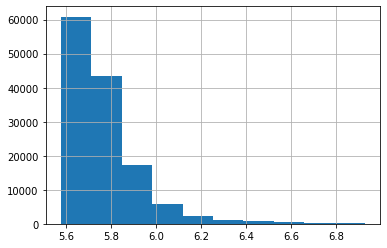

In [22]:
np.log1p(train_data['wl_1018662']).hist()

In [23]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# train_data.loc[:, feature_cols] = scaler.fit_transform(train_data.loc[:, feature_cols] )
# # # valid_data.loc[:, feature_cols] = scaler.transform(valid_data.loc[:, feature_cols] )



In [24]:
train_data.describe()

swl            inf            sfw           ecpc  \
count  132480.000000  132480.000000  132480.000000  132480.000000   
mean       25.048475     509.220145     219.437221      24.563391   
std         0.640225     922.878030      11.053973      11.053614   
min         0.000000    -990.000000      -0.010000       2.760000   
25%        24.970000     127.300000     212.140000      14.750000   
50%        25.072000     267.000000     216.890000      27.110000   
75%        25.154000     540.100000     229.250000      31.860000   
max        25.449000   25991.500000     241.240000     244.010000   

              tototf     tide_level     wl_1018662     fw_1018662  \
count  132480.000000  132480.000000  132480.000000  132480.000000   
mean      503.465377     341.617606     324.128367     683.365411   
std       918.109091     172.542093      65.668745     934.375557   
min      -990.000000      42.000000     262.700000     243.290000   
25%       132.000000     188.000000     287.700000     319.840000   
50%       178.000000     322.000000     304.700000     427.300000   
75%       522.000000     486.000000     336.700000     673.200000   
max     25791.500000     842.000000    1022.700000    9405.640000   

          wl_1018680     wl_1018683     fw_1018683     wl_1019630  \
count  132480.000000  132480.000000  132480.000000  132480.000000   
mean      311.117361     307.464885     554.580900     295.368380   
std        56.727716      54.960429    1106.521254      45.286992   
min       246.200000     247.000000   -3154.600000     241.300000   
25%       278.200000     275.000000     208.540000     267.300000   
50%       295.200000     292.000000     357.770000     283.300000   
75%       324.200000     321.000000     688.372500     310.300000   
max       885.200000     857.000000   16623.730000     663.300000   

          fw_1019630    rf_10184100    rf_10184110    rf_10184140  \
count  132480.000000  132480.000000  132480.000000  132480.000000   
mean      946.557133       0.034662       0.040859       0.038217   
std      1090.382890       0.344524       0.389436       0.383101   
min       212.040000       0.000000       0.000000       0.000000   
25%       449.120000       0.000000       0.000000       0.000000   
50%       639.830000       0.000000       0.000000       0.000000   
75%      1039.900000       0.000000       0.000000       0.000000   
max     15594.810000      24.000000      20.000000      24.000000   

                year  
count  132480.000000  
mean     2016.500000  
std         2.872292  
min      2012.000000  
25%      2014.000000  
50%      2016.500000  
75%      2019.000000  
max      2021.000000

In [25]:
train_data.tail()

swl    inf     sfw   ecpc  tototf  tide_level  \
ymdhm                                                                  
2021-07-31 23:10:00  25.07  250.0  213.96  30.04   149.0       549.0   
2021-07-31 23:20:00  25.07  244.0  213.96  30.04   143.0       546.0   
2021-07-31 23:30:00  25.07  244.0  213.96  30.04   143.0       541.0   
2021-07-31 23:40:00  25.06   42.0  213.59  30.41   143.0       533.0   
2021-07-31 23:50:00  25.06   42.0  213.59  30.41   143.0       524.0   

                     wl_1018662  fw_1018662  wl_1018680  wl_1018683  \
ymdhm                                                                 
2021-07-31 23:10:00       281.7      285.72       277.2       279.0   
2021-07-31 23:20:00       281.7      285.72       277.2       278.0   
2021-07-31 23:30:00       281.7      285.72       277.2       278.0   
2021-07-31 23:40:00       281.7      285.72       277.2       278.0   
2021-07-31 23:50:00       281.7      285.72       277.2       278.0   

                     fw_1018683  wl_1019630  fw_1019630  rf_10184100  \
ymdhm                                                                  
2021-07-31 23:10:00      286.12       264.3      417.17          0.0   
2021-07-31 23:20:00      277.43       264.3      417.17          0.0   
2021-07-31 23:30:00      318.84       263.3      406.79          0.0   
2021-07-31 23:40:00      265.01       263.3      406.79          0.0   
2021-07-31 23:50:00      248.45       263.3      406.79          0.0   

                     rf_10184110  rf_10184140  year  
ymdhm                                                
2021-07-31 23:10:00          0.0          0.0  2021  
2021-07-31 23:20:00          0.0          0.0  2021  
2021-07-31 23:30:00          0.0          0.0  2021  
2021-07-31 23:40:00          0.0          0.0  2021  
2021-07-31 23:50:00          0.0          0.0  2021

In [26]:
window_size = 6

train_features = []
train_labels = []

for year in range(2012, 2022):
    print(year)
    tmp = train_data[train_data['year']==year].reset_index(drop=True)
    for j in tqdm(range(len(tmp)-window_size)):
        train_features.append(np.array(tmp.loc[j:j + window_size - 1, feature_cols]).astype(float))    
        train_labels.append(np.array(tmp.loc[j + window_size, target_cols]).astype(float))

2012


100%|██████████| 13242/13242 [00:15<00:00, 882.43it/s]


2013


100%|██████████| 13242/13242 [00:13<00:00, 979.14it/s] 


2014


100%|██████████| 13242/13242 [00:13<00:00, 974.58it/s]


2015


100%|██████████| 13242/13242 [00:13<00:00, 953.57it/s]


2016


100%|██████████| 13242/13242 [00:13<00:00, 970.80it/s]


2017


100%|██████████| 13242/13242 [00:13<00:00, 971.46it/s]


2018


100%|██████████| 13242/13242 [00:13<00:00, 967.46it/s]


2019


100%|██████████| 13242/13242 [00:13<00:00, 977.33it/s]


2020


100%|██████████| 13242/13242 [00:13<00:00, 978.78it/s]


2021


100%|██████████| 13242/13242 [00:13<00:00, 975.36it/s]


In [27]:
# valid_features = []
# valid_labels = []

# for year in range(2020, 2021):
#     tmp = valid_data[valid_data['year']==year].reset_index(drop=True)
#     for j in tqdm(range(len(tmp)-window_size)):
#         valid_features.append(np.array(tmp.loc[j:j + window_size - 1, feature_cols]).astype(float))    
#         valid_labels.append(np.array(tmp.loc[j + window_size, target_cols]).astype(float))

In [28]:
train_features = np.array(train_features)
train_labels = np.array(train_labels)
# valid_features = np.array(valid_features)
# valid_labels = np.array(valid_labels)

In [29]:
train_features.shape#, valid_features.shape, valid_labels.shape  # (데이터, window, feature),

(132420, 6, 13)

In [30]:
inputshape = train_features[1,].shape
inputshape

(6, 13)

In [31]:
train_data.iloc[:72,:]

swl    inf     sfw   ecpc  tototf  tide_level  \
ymdhm                                                                   
2012-05-01 00:00:00  24.800  555.0  219.07  24.93   555.0       445.0   
2012-05-01 00:10:00  24.794  464.6  218.86  25.15   562.9       449.0   
2012-05-01 00:20:00  24.789  478.1  218.69  25.31   576.4       451.0   
2012-05-01 00:30:00  24.789  464.8  218.69  25.31   563.1       452.0   
2012-05-01 00:40:00  24.789  478.1  218.69  25.31   576.4       450.0   
...                     ...    ...     ...    ...     ...         ...   
2012-05-01 11:10:00  24.779  616.9  218.38  25.63   518.6       401.0   
2012-05-01 11:20:00  24.779  610.4  218.38  25.63   512.1       416.0   
2012-05-01 11:30:00  24.779  616.9  218.38  25.63   518.6       431.0   
2012-05-01 11:40:00  24.779  616.9  218.38  25.63   518.6       445.0   
2012-05-01 11:50:00  24.779  610.4  218.38  25.63   512.1       458.0   

                     wl_1018662  fw_1018662  wl_1018680  wl_1018683  \
ymdhm                                                                 
2012-05-01 00:00:00       310.7      469.05       300.2       290.0   
2012-05-01 00:10:00       314.7      498.00       300.2       290.0   
2012-05-01 00:20:00       313.7      490.68       301.2       290.0   
2012-05-01 00:30:00       311.7      476.21       301.2       290.0   
2012-05-01 00:40:00       311.7      476.21       301.2       291.0   
...                         ...         ...         ...         ...   
2012-05-01 11:10:00       316.7      512.81       305.2       295.0   
2012-05-01 11:20:00       316.7      512.81       305.2       295.0   
2012-05-01 11:30:00       314.7      498.00       304.2       295.0   
2012-05-01 11:40:00       317.7      520.30       304.2       294.0   
2012-05-01 11:50:00       313.7      490.68       304.2       294.0   

                     fw_1018683  wl_1019630  fw_1019630  rf_10184100  \
ymdhm                                                                  
2012-05-01 00:00:00      729.80       275.3      540.18          0.0   
2012-05-01 00:10:00      731.48       275.3      540.18          0.0   
2012-05-01 00:20:00      726.42       275.3      540.18          0.0   
2012-05-01 00:30:00      726.42       276.3      552.17          0.0   
2012-05-01 00:40:00      707.17       277.3      564.29          0.0   
...                         ...         ...         ...          ...   
2012-05-01 11:10:00      607.54       281.3      614.11          0.0   
2012-05-01 11:20:00      602.45       281.3      614.11          0.0   
2012-05-01 11:30:00      599.06       281.3      614.11          0.0   
2012-05-01 11:40:00      574.50       281.3      614.11          0.0   
2012-05-01 11:50:00      530.44       281.3      614.11          0.0   

                     rf_10184110  rf_10184140  year  
ymdhm                                                
2012-05-01 00:00:00          0.0          0.0  2012  
2012-05-01 00:10:00          0.0          0.0  2012  
2012-05-01 00:20:00          0.0          0.0  2012  
2012-05-01 00:30:00          0.0          0.0  2012  
2012-05-01 00:40:00          0.0          0.0  2012  
...                          ...          ...   ...  
2012-05-01 11:10:00          0.0          0.0  2012  
2012-05-01 11:20:00          0.0          0.0  2012  
2012-05-01 11:30:00          0.0          0.0  2012  
2012-05-01 11:40:00          0.0          0.0  2012  
2012-05-01 11:50:00          0.0          0.0  2012  

[72 rows x 17 columns]

#### feedback
##### 4개의 다리에대한 각각의 모델로 만드는것도 좋을거같다.
##### 강우량 데이터 빼고해도 괜찮을거같다. (상관계수 확인해서 변수개수를 줄여 간단한 모델을 만드는게 나을거같다.)


In [62]:
model = tf.keras.models.Sequential([
  # tf.keras.layers.Conv1D(filters=32, kernel_size=3,
  #                     strides=1, padding="causal",
  #                     activation="relu",
  #                     input_shape=inputshape),
  tf.keras.layers.LSTM(256, return_sequences=False, input_shape=inputshape),
  # tf.keras.layers.Dense(128, activation='relu'),
  # tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(1),
])


optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(loss='mse',
              optimizer=optimizer,
              metrics=["mae"])


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 256)               276480    
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 276,737
Trainable params: 276,737
Non-trainable params: 0
_________________________________________________________________


In [63]:
hist = model.fit(train_features, train_labels, epochs=10, batch_size=64)

Epoch 1/10
2070/2070 [==============================] - 10s 4ms/step - loss: 30595.4688 - mae: 134.8761
Epoch 2/10
2070/2070 [==============================] - 7s 4ms/step - loss: 1831.5945 - mae: 16.3267
Epoch 3/10
2070/2070 [==============================] - 7s 4ms/step - loss: 539.5097 - mae: 6.8043
Epoch 4/10
2070/2070 [==============================] - 7s 4ms/step - loss: 272.2916 - mae: 5.1310
Epoch 5/10
2070/2070 [==============================] - 8s 4ms/step - loss: 216.8930 - mae: 4.8316
Epoch 6/10
2070/2070 [==============================] - 7s 4ms/step - loss: 189.2932 - mae: 4.6192
Epoch 7/10
2070/2070 [==============================] - 7s 4ms/step - loss: 186.2366 - mae: 4.4269
Epoch 8/10
2070/2070 [==============================] - 7s 4ms/step - loss: 162.0854 - mae: 4.1434
Epoch 9/10
2070/2070 [==============================] - 7s 4ms/step - loss: 162.1723 - mae: 4.2607
Epoch 10/10
2070/2070 [==============================] - 7s 4ms/step - loss: 161.0863 - mae: 4.1918


In [64]:

# hist = model.fit(valid_features, valid_labels, initial_epoch=10, epochs=20, batch_size=64)

## 추론

In [65]:
print(w_list[-1])
print(rf_list[-1])

/content/drive/MyDrive/데이콘/팔당댐 홍수 안전운영에 따른 한강 수위예측 AI 경진대회/competition_data/water_data/data_2022.csv
/content/drive/MyDrive/데이콘/팔당댐 홍수 안전운영에 따른 한강 수위예측 AI 경진대회/competition_data/rf_data/rf_2022.csv


In [66]:
test_data = load_data('2022')
test_data['year'] = 2022
test_data.shape
test_data.head()

swl     inf     sfw   ecpc  tototf  tide_level  \
ymdhm                                                                   
2022-05-01 00:00:00  25.20  739.36  218.73  25.27  124.36        81.0   
2022-05-01 00:10:00  25.20  124.48  218.73  25.27  124.48        72.0   
2022-05-01 00:20:00  25.20  124.20  218.73  25.27  124.20        64.0   
2022-05-01 00:30:00  25.20  124.35  218.73  25.27  124.35        58.0   
2022-05-01 00:40:00  25.19    0.00  218.36  25.64  124.42        58.0   

                     wl_1018662  fw_1018662  wl_1018680  wl_1018683  \
ymdhm                                                                 
2022-05-01 00:00:00       290.7      337.64       284.2       279.0   
2022-05-01 00:10:00       291.7      343.69       284.2       279.0   
2022-05-01 00:20:00       290.7      337.64       284.2       279.0   
2022-05-01 00:30:00       289.7      331.65       284.2       279.0   
2022-05-01 00:40:00       287.7      319.84       284.2       279.0   

                     fw_1018683  wl_1019630  fw_1019630  rf_10184100  \
ymdhm                                                                  
2022-05-01 00:00:00        0.00       269.3      471.08          0.0   
2022-05-01 00:10:00      145.14       266.3      438.33          0.0   
2022-05-01 00:20:00      232.22       264.3      417.17          0.0   
2022-05-01 00:30:00      302.71       263.3      406.79          0.0   
2022-05-01 00:40:00      340.03       264.3      417.17          0.0   

                     rf_10184110  rf_10184140  year  
ymdhm                                                
2022-05-01 00:00:00          0.0          0.0  2022  
2022-05-01 00:10:00          0.0          0.0  2022  
2022-05-01 00:20:00          0.0          0.0  2022  
2022-05-01 00:30:00          0.0          0.0  2022  
2022-05-01 00:40:00          0.0          0.0  2022

In [67]:
# test_data.loc[:, feature_cols] = scaler.fit_transform(test_data.loc[:, feature_cols] )
# test_data.head()

In [68]:
test_features = []
test_label = []

tmp = test_data[test_data['year']==2022].reset_index(drop=True)

for j in tqdm(range(len(tmp)-window_size)):
    # print('feature_j:',j)
    # print('feature_j+window_size:',j + window_size-1)
    test_features.append(np.array(tmp.loc[j:j + window_size-1, feature_cols]).astype(float))    
    # print('label_j:',j)
    # print('label_j+window_size:',j + window_size)
    test_label.append(np.array(tmp.loc[j + window_size, target_cols]).astype(float))

100%|██████████| 11370/11370 [00:11<00:00, 969.13it/s]


In [69]:
tmp.loc[0:0+window_size-1, feature_cols]

swl     inf     sfw   ecpc  tototf  tide_level  wl_1018662  fw_1018662  \
0  25.20  739.36  218.73  25.27  124.36        81.0       290.7      337.64   
1  25.20  124.48  218.73  25.27  124.48        72.0       291.7      343.69   
2  25.20  124.20  218.73  25.27  124.20        64.0       290.7      337.64   
3  25.20  124.35  218.73  25.27  124.35        58.0       289.7      331.65   
4  25.19    0.00  218.36  25.64  124.42        58.0       287.7      319.84   
5  25.19  124.65  218.36  25.64  124.65        75.0       286.7      314.01   

   fw_1018683  fw_1019630  rf_10184100  rf_10184110  rf_10184140  
0        0.00      471.08          0.0          0.0          0.0  
1      145.14      438.33          0.0          0.0          0.0  
2      232.22      417.17          0.0          0.0          0.0  
3      302.71      406.79          0.0          0.0          0.0  
4      340.03      417.17          0.0          0.0          0.0  
5      393.38      427.69          0.0          0.0          0.0

In [70]:
test_data.iloc[4464:,:]

swl     inf     sfw   ecpc  tototf  tide_level  \
ymdhm                                                                   
2022-06-01 00:00:00  25.19  140.60  218.36  25.64  140.60       162.0   
2022-06-01 00:10:00  25.19  140.78  218.36  25.64  140.78       151.0   
2022-06-01 00:20:00  25.20  755.90  218.73  25.27  140.90       141.0   
2022-06-01 00:30:00  25.19    0.00  218.36  25.64  140.94       130.0   
2022-06-01 00:40:00  25.19  140.63  218.36  25.64  140.63       120.0   
...                    ...     ...     ...    ...     ...         ...   
2022-07-18 23:10:00  25.04  259.23  212.86  31.14  259.23       510.0   
2022-07-18 23:20:00  25.04  260.46  212.86  31.14  260.46       492.0   
2022-07-18 23:30:00  25.04  259.37  212.86  31.14  259.37       475.0   
2022-07-18 23:40:00  25.04  259.13  212.86  31.14  259.13       458.0   
2022-07-18 23:50:00  25.04  258.16  212.86  31.14  258.16       442.0   

                     wl_1018662  fw_1018662  wl_1018680  wl_1018683  \
ymdhm                                                                 
2022-06-01 00:00:00         0.0      269.40         0.0         0.0   
2022-06-01 00:10:00         0.0      280.22         0.0         0.0   
2022-06-01 00:20:00         0.0      296.87         0.0         0.0   
2022-06-01 00:30:00         0.0      302.53         0.0         0.0   
2022-06-01 00:40:00         0.0      296.87         0.0         0.0   
...                         ...         ...         ...         ...   
2022-07-18 23:10:00         0.0      319.84         0.0         0.0   
2022-07-18 23:20:00         0.0      314.01         0.0         0.0   
2022-07-18 23:30:00         0.0      387.55         0.0         0.0   
2022-07-18 23:40:00         0.0      454.91         0.0         0.0   
2022-07-18 23:50:00         0.0      582.21         0.0         0.0   

                     fw_1018683  wl_1019630  fw_1019630  rf_10184100  \
ymdhm                                                                  
2022-06-01 00:00:00        8.23         0.0      471.08          0.0   
2022-06-01 00:10:00       28.82         0.0      449.12          0.0   
2022-06-01 00:20:00       12.35         0.0      417.17          0.0   
2022-06-01 00:30:00       53.52         0.0      386.43          0.0   
2022-06-01 00:40:00      107.04         0.0      366.60          0.0   
...                         ...         ...         ...          ...   
2022-07-18 23:10:00     -456.41         0.0      974.40          0.0   
2022-07-18 23:20:00     -717.30         0.0     1006.88          0.0   
2022-07-18 23:30:00     -843.37         0.0     1039.90          0.0   
2022-07-18 23:40:00    -1023.37         0.0     1073.46          0.0   
2022-07-18 23:50:00    -1049.44         0.0     1090.45          0.0   

                     rf_10184110  rf_10184140  year  
ymdhm                                                
2022-06-01 00:00:00          0.0          0.0  2022  
2022-06-01 00:10:00          0.0          0.0  2022  
2022-06-01 00:20:00          0.0          0.0  2022  
2022-06-01 00:30:00          0.0          0.0  2022  
2022-06-01 00:40:00          0.0          0.0  2022  
...                          ...          ...   ...  
2022-07-18 23:10:00          0.0          0.0  2022  
2022-07-18 23:20:00          0.0          0.0  2022  
2022-07-18 23:30:00          0.0          0.0  2022  
2022-07-18 23:40:00          0.0          0.0  2022  
2022-07-18 23:50:00          0.0          0.0  2022  

[6912 rows x 17 columns]

In [71]:
test_data.index

DatetimeIndex(['2022-05-01 00:00:00', '2022-05-01 00:10:00',
               '2022-05-01 00:20:00', '2022-05-01 00:30:00',
               '2022-05-01 00:40:00', '2022-05-01 00:50:00',
               '2022-05-01 01:00:00', '2022-05-01 01:10:00',
               '2022-05-01 01:20:00', '2022-05-01 01:30:00',
               ...
               '2022-07-18 22:20:00', '2022-07-18 22:30:00',
               '2022-07-18 22:40:00', '2022-07-18 22:50:00',
               '2022-07-18 23:00:00', '2022-07-18 23:10:00',
               '2022-07-18 23:20:00', '2022-07-18 23:30:00',
               '2022-07-18 23:40:00', '2022-07-18 23:50:00'],
              dtype='datetime64[ns]', name='ymdhm', length=11376, freq=None)

In [72]:
# tmp[4464:]

In [73]:
test_features = np.array(test_features)
test_label = np.array(test_label)

print(test_features.shape)
print(test_label.shape)

(11370, 6, 13)
(11370, 1)


In [74]:
pred = model.predict(test_features)

In [75]:
test_data.iloc[window_size:,:].index

DatetimeIndex(['2022-05-01 01:00:00', '2022-05-01 01:10:00',
               '2022-05-01 01:20:00', '2022-05-01 01:30:00',
               '2022-05-01 01:40:00', '2022-05-01 01:50:00',
               '2022-05-01 02:00:00', '2022-05-01 02:10:00',
               '2022-05-01 02:20:00', '2022-05-01 02:30:00',
               ...
               '2022-07-18 22:20:00', '2022-07-18 22:30:00',
               '2022-07-18 22:40:00', '2022-07-18 22:50:00',
               '2022-07-18 23:00:00', '2022-07-18 23:10:00',
               '2022-07-18 23:20:00', '2022-07-18 23:30:00',
               '2022-07-18 23:40:00', '2022-07-18 23:50:00'],
              dtype='datetime64[ns]', name='ymdhm', length=11370, freq=None)

In [76]:
pred = pd.DataFrame(pred)
pred_ckeck=pred.set_index(test_data.iloc[window_size:,:].index)

In [77]:
pred_ckeck.iloc[4464-window_size:,:]

0
ymdhm                          
2022-06-01 00:00:00  284.327393
2022-06-01 00:10:00  289.534546
2022-06-01 00:20:00  290.131561
2022-06-01 00:30:00  295.393127
2022-06-01 00:40:00  293.241913
...                         ...
2022-07-18 23:10:00  313.939087
2022-07-18 23:20:00  316.956879
2022-07-18 23:30:00  331.745148
2022-07-18 23:40:00  340.426483
2022-07-18 23:50:00  356.168488

[6912 rows x 1 columns]

In [78]:
# # row 생략 없이 출력
# pd.set_option('display.max_rows', None)
# # col 생략 없이 출력
# pd.set_option('display.max_columns', None)

In [79]:
pred_real=pred.iloc[4464-window_size:,:]

In [80]:
pred_real

0
4458   284.327393
4459   289.534546
4460   290.131561
4461   295.393127
4462   293.241913
...           ...
11365  313.939087
11366  316.956879
11367  331.745148
11368  340.426483
11369  356.168488

[6912 rows x 1 columns]

In [81]:
pred_real=pred_real.reset_index(drop=True)
pred_real

0
0     284.327393
1     289.534546
2     290.131561
3     295.393127
4     293.241913
...          ...
6907  313.939087
6908  316.956879
6909  331.745148
6910  340.426483
6911  356.168488

[6912 rows x 1 columns]

In [82]:
sample_submission = pd.read_csv("/content/drive/MyDrive/데이콘/팔당댐 홍수 안전운영에 따른 한강 수위예측 AI 경진대회/competition_data/sample_submission.csv")

sample_submission["wl_1018662"] = pred_real[0]
sample_submission["wl_1018680"] = pred_real[1]
sample_submission["wl_1018683"] = pred_real[2]
sample_submission["wl_1019630"] = pred_real[3]

KeyError: ignored

In [ ]:
sample_submission

In [54]:
# 

In [55]:
# sample_submission.to_csv("/content/drive/MyDrive/데이콘/팔당댐 홍수 안전운영에 따른 한강 수위예측 AI 경진대회/submit/0806_submit03_ws6_baselinnn_lr0001_lstm2_45.csv", index = False)

# score 계산

In [56]:
# y_pred=sample_submission.loc[:,'wl_1018662':'wl_1019630']
# y_pred

In [57]:
# test_data_df = pd.DataFrame(test_data)
# test_data_df

In [58]:
# y_true = test_data.loc[:, feature_cols]
# y_true

In [59]:
# from sklearn.metrics import r2_score

# r2 = r2_score(y_true, y_pred)


In [60]:
# from sklearn.metrics import mean_squared_error

# RMSE = mean_squared_error(y_true, y_pred)**0.5


In [61]:
# RMSE/r2